In [23]:
# image_dataset_from_directory in tensorflow to concatenate them into a single dataset while preparing it for deep learning
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import warnings
import re

# Escape the special characters to make it a valid regular expression
warning_message = re.escape("Your `PyDataset` class should call `super().__init__(**kwargs)`")
warnings.filterwarnings("ignore", message=warning_message)


In [24]:
# path to your dataset folder
dataset_path = r"C:\Users\Anik\Desktop\PlantVillage"

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images here
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should not be augmented (just rescaled)
val_datagen = ImageDataGenerator(rescale=1./255)

# Apply the augmentation to the train and validation datasets
train_dataset = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # For sparse categorical labels
)

val_dataset = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # For sparse categorical labels
)


Found 2152 images belonging to 4 classes.
Found 2152 images belonging to 4 classes.


In [26]:
# Check the dataset
class_names = list(train_dataset.class_indices.keys())
print("Classes:", class_names)

Classes: ['.git', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [27]:
from tensorflow.keras import layers, models

In [28]:
# Build a simple CNN model
model = models.Sequential([
    # First convolutional layer with 32 filters
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    
    # Flatten the image data to connect to dense layers
    layers.Flatten(),
    
    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    
    # Output layer with a number of neurons equal to the number of classes
    layers.Dense(len(class_names), activation='softmax')  # Output for multi-class classification
])

C:\Users\Anik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer=optimizers.Adam(),
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,710,148 (98.08 MB)

 Trainable params: 25,710,148 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(
    train_dataset,  # Training dataset
    validation_data=val_dataset,  # Correct argument name for validation data
    epochs=10  # Number of epochs to train the model
)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 47s 696ms/step - accuracy: 0.7370 - loss: 0.6620 - val_accuracy: 0.8202 - val_loss: 0.4478
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 903ms/step - accuracy: 0.8358 - loss: 0.3754 - val_accuracy: 0.9512 - val_loss: 0.1499
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 55s 804ms/step - accuracy: 0.8710 - loss: 0.3118 - val_accuracy: 0.8494 - val_loss: 0.3518
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 59s 862ms/step - accuracy: 0.9214 - loss: 0.2065 - val_accuracy: 0.9312 - val_loss: 0.1783
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 57s 832ms/step - accuracy: 0.9408 - loss: 0.1604 - val_accuracy: 0.8950 - val_loss: 0.2612
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 707ms/step - accuracy: 0.9685 - loss: 0.1020 - val_accuracy: 0.9280 - val_loss: 0.1695
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 50s 730ms/step - accuracy: 0.9415 - loss: 0.1544 - val_accuracy: 0.8295 - val_loss: 0.4367
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 716ms/step - accuracy: 0.9433 - loss: 0.1550 - val_accu

In [33]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.2f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8612 - loss: 0.3034
Validation Accuracy: 86.11%
Validation Loss: 0.32


In [34]:
# convert the trainded model to tensorflow lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [35]:
# convert the model
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmph9boqntq\assets


INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmph9boqntq\assets


Saved artifact at 'C:\Users\Anik\AppData\Local\Temp\tmph9boqntq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1828446384208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828446385936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449636752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449640400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449640592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641936: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [37]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Perform the conversion
tflite_model = converter.convert()

# Save the converted model
with open('cnn_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmphxo9opl2\assets


INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmphxo9opl2\assets


Saved artifact at 'C:\Users\Anik\AppData\Local\Temp\tmphxo9opl2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1828446384208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828446385936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449636752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449640400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449640592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1828449641936: TensorSpec(shape=(), dtype=tf.resource, name=None)


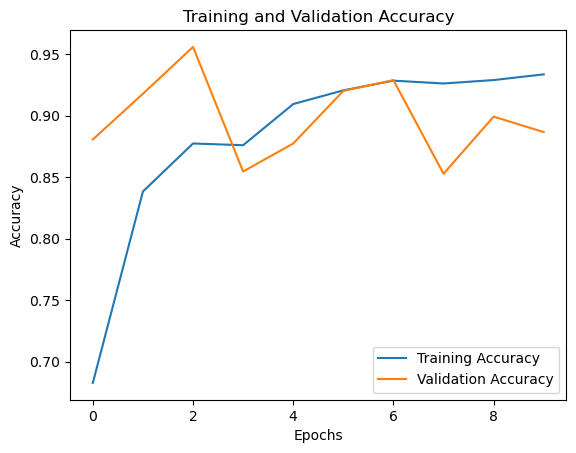

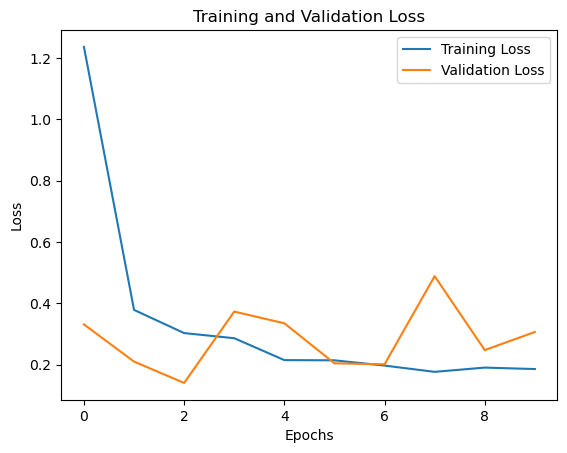

In [38]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Correct image path
img_path = r'C:\Users\Anik\Pictures\Screenshots\sample.png'

# Check if file exists
import os
if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}")
else:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image

    # Predict class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get the class with highest probability

    # Print predicted class
    print(f"Predicted Class: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: Potato___Early_blight


In [44]:
import os

img_path = r'C:\Users\Anik\Pictures\Screenshots\sample.png'

if os.path.exists(img_path):
    print("File exists and is accessible.")
else:
    print("File not found. Check the path carefully.")


File exists and is accessible.
